In [274]:
import numpy
import pandas as pd

from pandas import Series
from pandas import DataFrame

import matplotlib.pyplot as plt

In [275]:
sample='eliminated'

In [276]:
if sample=='all': 
    output_path='Z:/SnapshotEvolution/Graphical Output/all'
else:
    output_path='Z:/SnapshotEvolution/Graphical Output/without_ARN-LIN-TRN'    

In [277]:
date_past='18.03.2019'
date_present='25.03.2019'
week_cutoff=13

date_past__reformat=date_past.split('.')[2]+'_'+date_past.split('.')[1]+'_'+date_past.split('.')[0]
date_present__reformat=date_present.split('.')[2]+'_'+date_present.split('.')[1]+'_'+date_present.split('.')[0]

In [278]:
Data_Past=pd.read_csv('Z:/SnapshotEvolution/'+date_past__reformat+'_Load_factor_per_week_vs_LY_YTD.csv',sep=';')
Data_Past['snapshot']=date_past
Data_Past=Data_Past[['snapshot']+[x for x in Data_Past.columns if x!='snapshot']]

Data_Current=pd.read_csv('Z:/SnapshotEvolution/'+date_present__reformat+'_Load_factor_per_week_vs_LY_YTD.csv',sep=';')
Data_Current['snapshot']=date_present
Data_Current=Data_Current[['snapshot']+[x for x in Data_Current.columns if x!='snapshot']]

Data=pd.concat([Data_Past,Data_Current])

Data['Outbound']=Data['Outbound'].apply(lambda x: float(str(x).replace(',','.')))
Data['Inbound']=Data['Inbound'].apply(lambda x: float(str(x).replace(',','.')))     

Data=Data.dropna(how='any')
Data=Data.loc[Data['Route']!='TOTAL',:]
Data=Data.loc[Data['Week']>=week_cutoff,:]
Data=Data.groupby(['snapshot','Route','Calendar Year','Week'])[['Outbound','Inbound']].apply(lambda x: x.mean()).reset_index()
Data['Week']=Data['Week'].astype('int')

Data_Level=Data.loc[Data['snapshot']==date_present,:]

if sample=='eliminated':
    Data=Data.loc[Data['Route'].apply(lambda x: x not in ['ARN','LIN','TRN']),:]

In [279]:
Data_AggAll=Data.groupby(['snapshot','Calendar Year','Week'])['Outbound','Inbound'].apply(lambda x: x.mean()).reset_index()
Data_AggAll_Level=Data_AggAll.loc[Data_AggAll['snapshot']==date_present,:]
Data_AggAll_2018=Data_AggAll.loc[Data_AggAll['Calendar Year']==2018,:]
Data_AggAll_2018=Data_AggAll_2018.sort_values(by=['Calendar Year','Week'])
Data_AggAll_2019=Data_AggAll.loc[Data_AggAll['Calendar Year']==2019,:]
Data_AggAll_2019=Data_AggAll_2019.sort_values(by=['Calendar Year','Week'])

In [280]:
Data_AggAll_2018['Diff_In']=Data_AggAll_2018.groupby(['Week'])['Inbound'].transform(Series.diff)
Data_AggAll_2018['Diff_Out']=Data_AggAll_2018.groupby(['Week'])['Outbound'].transform(Series.diff)
Data_AggAll_2018__1=Data_AggAll_2018.loc[-pd.isnull(Data_AggAll_2018['Diff_In']),[x for x in Data_AggAll_2018.columns if x!='Inbound' and x!='Outbound']]
Data_AggAll_2018__2=Data_AggAll_2018.loc[pd.isnull(Data_AggAll_2018['Diff_In']),[x for x in Data_AggAll_2018.columns if 'Diff' not in x]]
Data_AggAll_2018=Data_AggAll_2018__1.merge(Data_AggAll_2018__2,on=['Week'])

Data_AggAll_2019['Diff_In']=Data_AggAll_2019.groupby(['Week'])['Inbound'].transform(Series.diff)
Data_AggAll_2019['Diff_Out']=Data_AggAll_2019.groupby(['Week'])['Outbound'].transform(Series.diff)
Data_AggAll_2019__1=Data_AggAll_2019.loc[-pd.isnull(Data_AggAll_2019['Diff_In']),[x for x in Data_AggAll_2019.columns if x!='Inbound' and x!='Outbound']]
Data_AggAll_2019__2=Data_AggAll_2019.loc[pd.isnull(Data_AggAll_2019['Diff_In']),[x for x in Data_AggAll_2019.columns if 'Diff' not in x]]
Data_AggAll_2019=Data_AggAll_2019__1.merge(Data_AggAll_2019__2,on=['Week'])

In [281]:
Data_AggAll_2018=Data_AggAll_2018[['Week','Diff_In','Diff_Out']].rename(columns={'Diff_In': 'Diff_In__2018','Diff_Out': 'Diff_Out__2018'})
Data_AggAll_2019=Data_AggAll_2019[['Week','Diff_In','Diff_Out']].rename(columns={'Diff_In': 'Diff_In__2019','Diff_Out': 'Diff_Out__2019'})

In [282]:
Data_AggAll=Data_AggAll_2018.merge(Data_AggAll_2019,on=['Week'])

Data_AggAll['Diff_In']=Data_AggAll['Diff_In__2019']-Data_AggAll['Diff_In__2018']
Data_AggAll['Diff_Out']=Data_AggAll['Diff_Out__2019']-Data_AggAll['Diff_Out__2018']

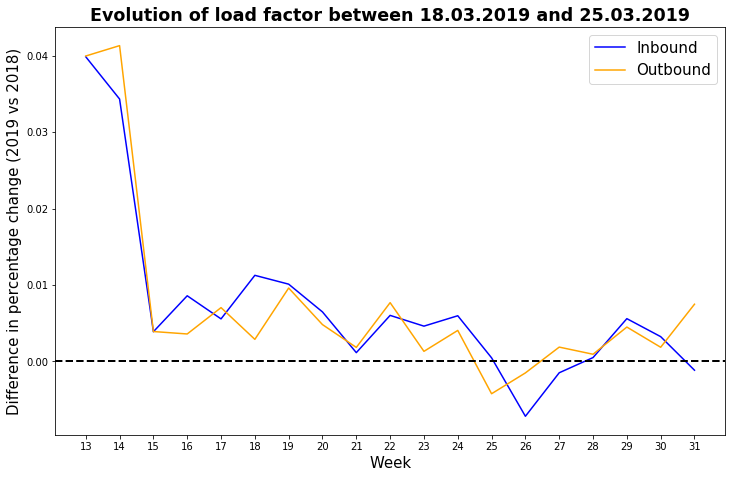

In [283]:
plt.figure(figsize=(12,7.5))

plt.plot(Data_AggAll['Week'],Data_AggAll['Diff_In'],
            color='blue',label='Inbound')
plt.plot(Data_AggAll['Week'],Data_AggAll['Diff_Out'],
            color='orange',label='Outbound')   

plt.axhline(linewidth=2,color='black',linestyle='--')
    
plt.xticks(range(week_cutoff,32))
plt.xlabel('Week',size=15)
plt.ylabel('Difference in percentage change ('+date_present.split('.')[2]+' vs '+str(int(date_past.split('.')[2])-1)+')',size=15)
plt.title('Evolution of load factor between '+date_past+' and '+date_present,size=17.5,fontweight='bold')

plt.legend(prop={'size': 15})

plt.savefig(output_path+'/Evolution_All.png')

In [284]:
Data_2018=Data.loc[Data['Calendar Year']==2018,:]
Data_2018=Data_2018.sort_values(by=['Route','Calendar Year','Week'])
Data_2019=Data.loc[Data['Calendar Year']==2019,:]
Data_2019=Data_2019.sort_values(by=['Route','Calendar Year','Week'])

Data_2018['Diff_In']=Data_2018.groupby(['Route','Week'])['Inbound'].transform(Series.diff)
Data_2018['Diff_Out']=Data_2018.groupby(['Route','Week'])['Outbound'].transform(Series.diff)
Data_2018__1=Data_2018.loc[-pd.isnull(Data_2018['Diff_In']),[x for x in Data_2018.columns if x!='Inbound' and x!='Outbound']]
Data_2018__2=Data_2018.loc[pd.isnull(Data_2018['Diff_In']),[x for x in Data_2018.columns if 'Diff' not in x]]
Data_2018=Data_2018__1.merge(Data_2018__2,on=['Route','Week'])

Data_2019['Diff_In']=Data_2019.groupby(['Route','Week'])['Inbound'].transform(Series.diff)
Data_2019['Diff_Out']=Data_2019.groupby(['Route','Week'])['Outbound'].transform(Series.diff)
Data_2019__1=Data_2019.loc[-pd.isnull(Data_2019['Diff_In']),[x for x in Data_2019.columns if x!='Inbound' and x!='Outbound']]
Data_2019__2=Data_2019.loc[pd.isnull(Data_2019['Diff_In']),[x for x in Data_2019.columns if 'Diff' not in x]]
Data_2019=Data_2019__1.merge(Data_2019__2,on=['Route','Week'])

In [285]:
Data_2018=Data_2018[['Route','Week','Diff_In','Diff_Out']].rename(columns={'Diff_In': 'Diff_In__2018','Diff_Out': 'Diff_Out__2018'})
Data_2019=Data_2019[['Route','Week','Diff_In','Diff_Out']].rename(columns={'Diff_In': 'Diff_In__2019','Diff_Out': 'Diff_Out__2019'})

Data=Data_2018.merge(Data_2019,on=['Route','Week'])

Data['Diff_In']=Data['Diff_In__2019']-Data['Diff_In__2018']
Data['Diff_Out']=Data['Diff_Out__2019']-Data['Diff_Out__2018']

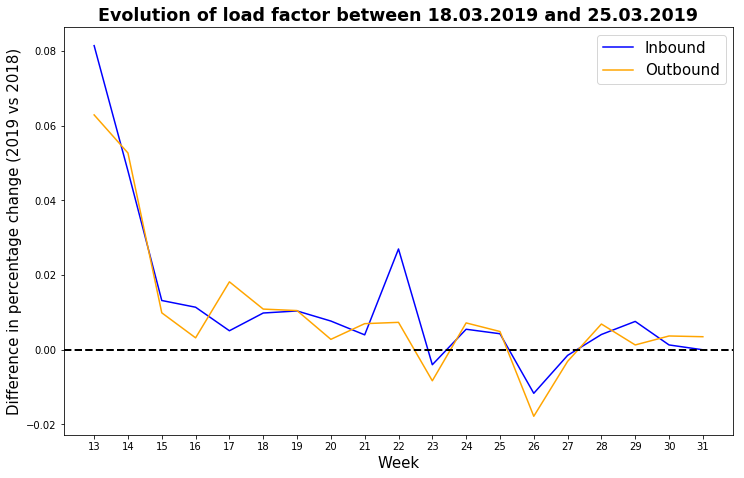

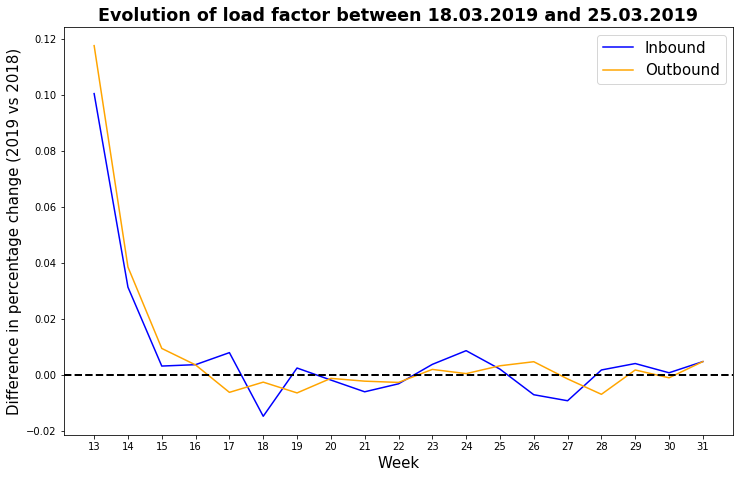

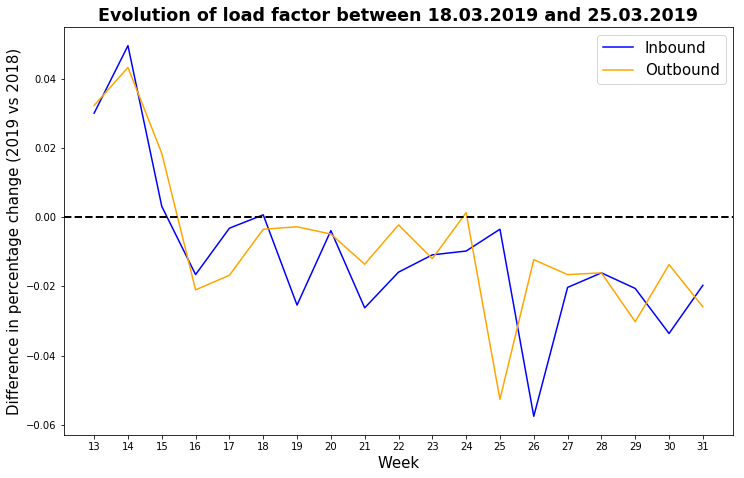

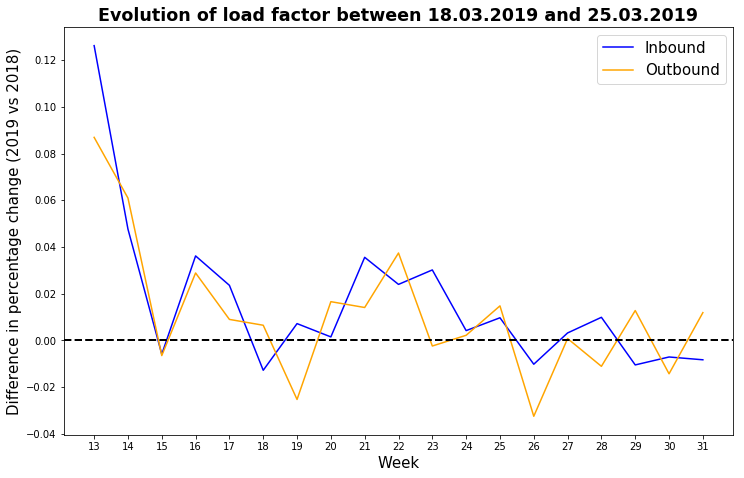

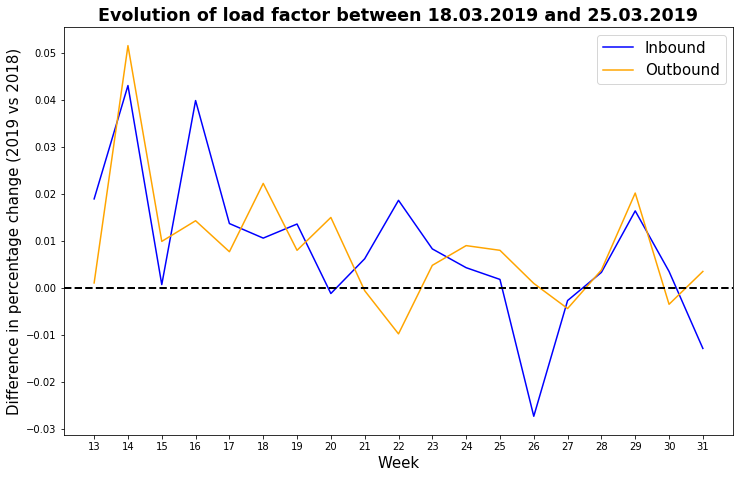

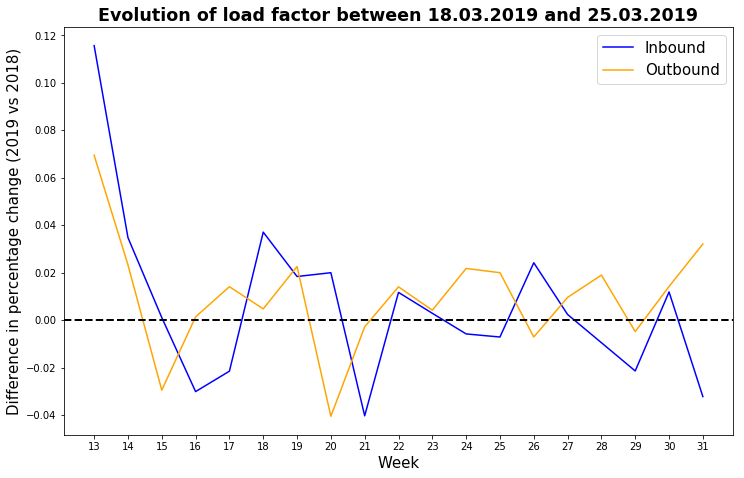

In [286]:
for pick_route in ['GVA','MXP','VIE','NCE','MUC','LIS']:

    plt.figure(figsize=(12,7.5))

    plt.plot(Data.loc[Data['Route']==pick_route,'Week'],Data.loc[Data['Route']==pick_route,'Diff_In'],
            color='blue',label='Inbound')
    plt.plot(Data.loc[Data['Route']==pick_route,'Week'],Data.loc[Data['Route']==pick_route,'Diff_Out'],
            color='orange',label='Outbound')   

    plt.axhline(linewidth=2,color='black',linestyle='--')
    
    plt.xticks(range(week_cutoff,32))
    plt.xlabel('Week',size=15)
    plt.ylabel('Difference in percentage change ('+date_present.split('.')[2]+' vs '+str(int(date_past.split('.')[2])-1)+')',size=15)
    plt.title('Evolution of load factor between '+date_past+' and '+date_present,size=17.5,fontweight='bold')

    plt.legend(prop={'size': 15})

    plt.savefig(output_path+'/Evolution_'+pick_route+'.png')

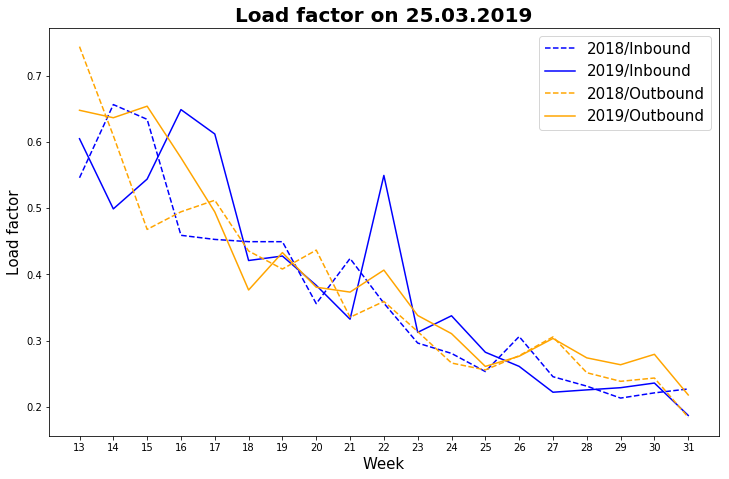

In [287]:
plt.figure(figsize=(12,7.5))

plt.plot(Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2018,'Week'],
             Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2018,'Inbound'],
            color='blue',linestyle='--',label='2018/Inbound')  
plt.plot(Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2019,'Week'],
             Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2019,'Inbound'],
            color='blue',linestyle='-',label='2019/Inbound')    
plt.plot(Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2018,'Week'],
             Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2018,'Outbound'],
            color='orange',linestyle='--',label='2018/Outbound')  
plt.plot(Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2019,'Week'],
             Data_AggAll_Level.loc[Data_AggAll_Level['Calendar Year']==2019,'Outbound'],
            color='orange',linestyle='-',label='2019/Outbound')  
    
plt.xticks(range(week_cutoff,32))
plt.xlabel('Week',size=15)
plt.ylabel('Load factor',size=15)
plt.title('Load factor on '+date_present,size=20,fontweight='bold')

plt.legend(prop={'size': 15})

plt.savefig(output_path+'/LF_All.png')

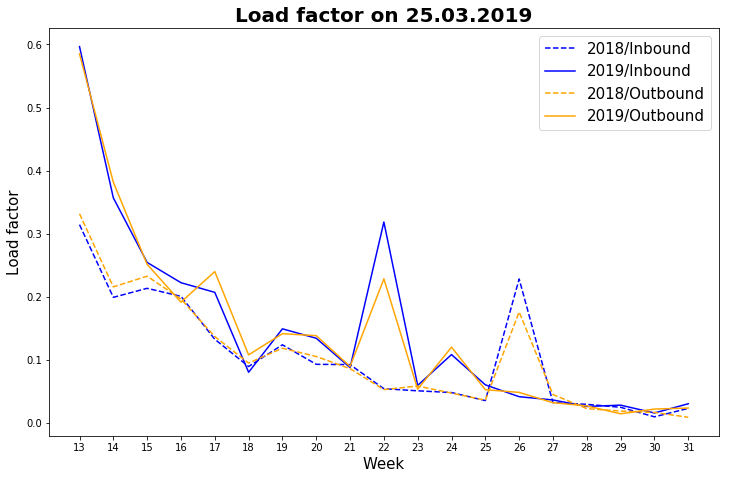

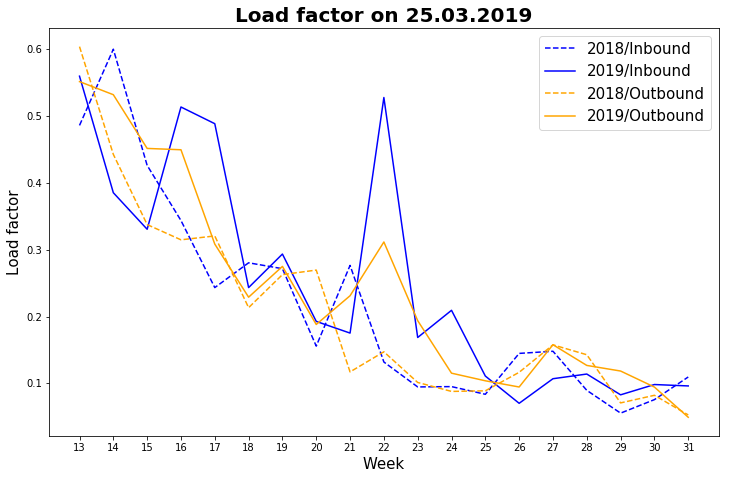

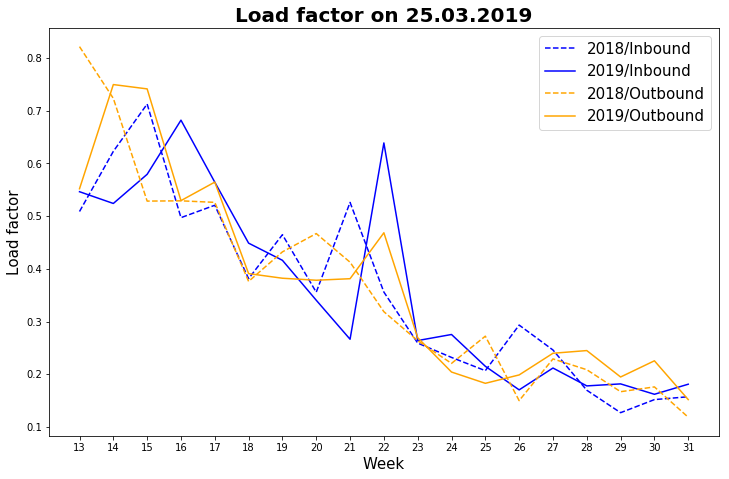

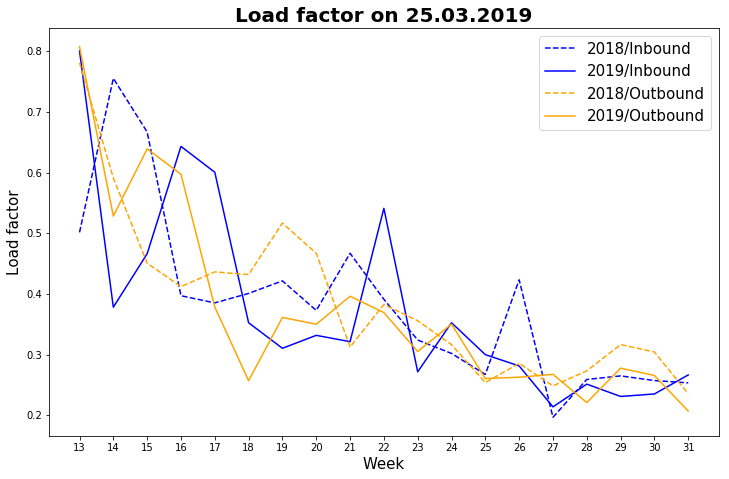

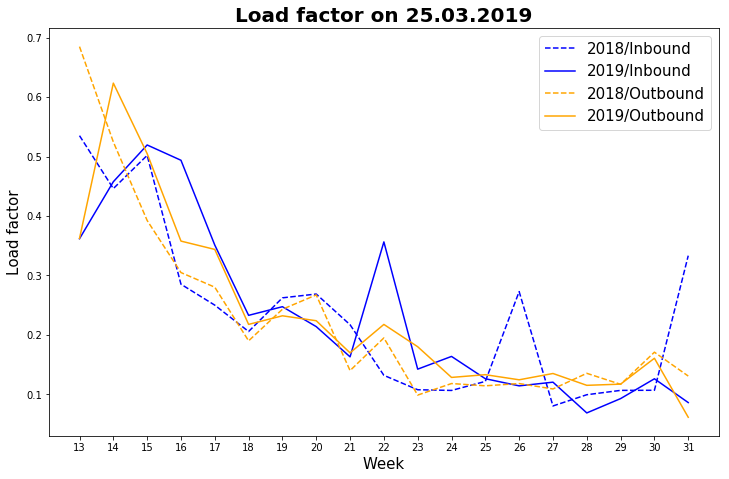

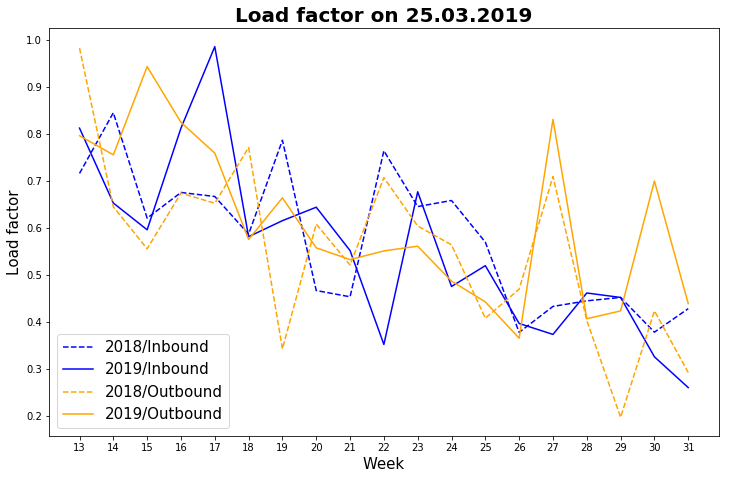

In [288]:
for pick_route in ['GVA','MXP','VIE','NCE','MUC','LIS']:

    plt.figure(figsize=(12,7.5))

    plt.plot(Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2018),'Week'],
             Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2018),'Inbound'],
            color='blue',linestyle='--',label='2018/Inbound')  
    plt.plot(Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2019),'Week'],
             Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2019),'Inbound'],
            color='blue',linestyle='-',label='2019/Inbound')    
    plt.plot(Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2018),'Week'],
             Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2018),'Outbound'],
            color='orange',linestyle='--',label='2018/Outbound')  
    plt.plot(Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2019),'Week'],
             Data_Level.loc[(Data_Level['Route']==pick_route)&(Data_Level['Calendar Year']==2019),'Outbound'],
            color='orange',linestyle='-',label='2019/Outbound')  
    
    plt.xticks(range(week_cutoff,32))
    plt.xlabel('Week',size=15)
    plt.ylabel('Load factor',size=15)
    plt.title('Load factor on '+date_present,size=20,fontweight='bold')

    plt.legend(prop={'size': 15})

    plt.savefig(output_path+'/LF_'+pick_route+'.png')